In [1]:
# Necessary imports
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plb 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

from model_evaluation import model_eval_with_alphavec, model_eval_with_alpha

#sns.set(context='notebook', style='whitegrid', font_scale=1.2)

## Data Import

In [2]:
sf = pd.read_csv('data_files/sf_clean.csv')

# Reformatting hood_district names
sf['hood_district'] = sf['hood_district'].astype(int)
sf['hood_district'] = sf['hood_district'].astype(str)

### Outliers (price > 10k per month)

In [3]:
sf = sf[sf['price'] < 10000]

## Feature Selection / Engineering

In [4]:
sf = sf.drop(['pets', 'housing_type'], axis=1)

In [5]:
# sns.pairplot(sf, height=2, aspect=1.25, corner=True);

In [6]:
sf = pd.get_dummies(sf)

In [7]:
cols_to_drop = ['laundry_(c) no laundry',
                'laundry_(b) on-site',
               #'pets_(d) no pets', 
               #'housing_type_(c) multi', 
               'parking_(d) no parking',
               'hood_district_10']

sf = sf.drop(cols_to_drop, axis=1)

In [8]:
sf.head()

,price,sqft,beds,bath,laundry_(a) in-unit,parking_(a) valet,parking_(b) protected,parking_(c) off-street,hood_district_1,hood_district_2,hood_district_3,hood_district_4,hood_district_5,hood_district_6,hood_district_7,hood_district_8,hood_district_9
0,6800,1600.0,2.0,2.0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,3500,550.0,1.0,1.0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,5100,1300.0,2.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,9000,3500.0,3.0,2.5,1,0,1,0,0,0,0,0,0,0,1,0,0
4,3100,561.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Model Evaluation

In [9]:
X, y = sf.drop('price',axis=1), sf['price']

In [10]:
rando_states = list(range(2, 16, 2))
rando_states

[2, 4, 6, 8, 10, 12, 14]

In [11]:
alphavec = 10**np.linspace(-2,1,100)

## Lasso

### Alpha evaluation

In [12]:
model_eval_with_alphavec(rando_states, alphavec, X, y, model_type='lasso')

Model Type:  lasso
Alpha evaluation in progress...

Random State:  2
~~~~~~~~~~~~~~~~~~
Best Alpha:  0.01
Lasso Regression train R^2: 0.79665
Lasso Regression test R^2: 0.80981

Train/Val R^2 Ratio:  0.98375

RMSE :  548.6039450743017
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  4
~~~~~~~~~~~~~~~~~~
Best Alpha:  0.01
Lasso Regression train R^2: 0.80165
Lasso Regression test R^2: 0.77522

Train/Val R^2 Ratio:  1.03409

RMSE :  655.6091820126697
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  6
~~~~~~~~~~~~~~~~~~
Best Alpha:  0.01
Lasso Regression train R^2: 0.80969
Lasso Regression test R^2: 0.76575

Train/Val R^2 Ratio:  1.05738

RMSE :  607.6772344012631
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  8
~~~~~~~~~~~~~~~~~~
Best Alpha:  0.464158883361278
Lasso Regression train R^2: 0.79717
Lasso Regression test R^2: 0.81500

Train/Val R^2 Ratio:  0.97813

RMSE :  619.0750687136525
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  10
~~~~~~~~~~~~~~~~~~
Best Alpha:  7.564

### Alpha chosen

In [13]:
las_alpha = 0.1
rando_states = list(range(0, 10))
len(rando_states)

10

In [14]:
model_eval_with_alpha(rando_states, X, y, model_type='lasso', alpha=las_alpha)

Model Type:  lasso
Alpha evaluation in progress...

Random State:  0
~~~~~~~~~~~~~~~~~~
Lasso Regression train R^2: 0.80658
Lasso Regression test R^2: 0.78173

Train/Val R^2 Ratio:  1.03179

RMSE :  641.2049379829973
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  1
~~~~~~~~~~~~~~~~~~
Lasso Regression train R^2: 0.81155
Lasso Regression test R^2: 0.78655

Train/Val R^2 Ratio:  1.03179

RMSE :  622.4960463929293
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  2
~~~~~~~~~~~~~~~~~~
Lasso Regression train R^2: 0.81966
Lasso Regression test R^2: 0.77796

Train/Val R^2 Ratio:  1.05361

RMSE :  584.3060972919992
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  3
~~~~~~~~~~~~~~~~~~
Lasso Regression train R^2: 0.82626
Lasso Regression test R^2: 0.78090

Train/Val R^2 Ratio:  1.05809

RMSE :  588.5221507534283
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  4
~~~~~~~~~~~~~~~~~~
Lasso Regression train R^2: 0.83359
Lasso Regression test R^2: 0.78717

Train/Val R^2 Ratio:  1.05897

R

### Charts

In [15]:
# Training versus Test Data
# hold out 20% of the data for testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=72)

# Scaling for Ridge & Lasso 
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X.values)
X_test_scaled = scaler.transform(X_test.values)

In [16]:
las = Lasso(alpha=las_alpha)

las.fit(X_train_scaled, y)
print(f'Ridge Regression train R^2: {las.score(X_train_scaled, y):.5f}')
print(f'Ridge Regression test R^2: {las.score(X_test_scaled, y_test):.5f}')

Ridge Regression train R^2: 0.80585
Ridge Regression test R^2: 0.77966


In [17]:
las_predict = las.predict(X_test_scaled)

rmse = mean_squared_error(y_test, las_predict, squared=False)
print(rmse)

659.2533853594322


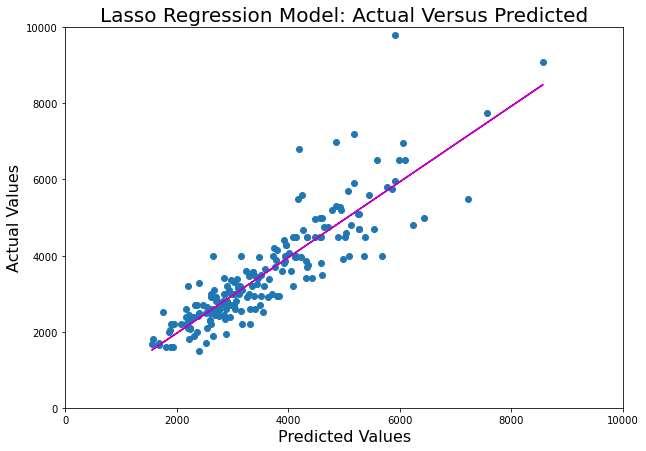

In [18]:
plt.figure(figsize=(10, 7))
plt.scatter(las_predict, y_test) 

z = np.polyfit(las_predict, y_test, 1)
p = np.poly1d(z)
plb.plot(las_predict, p(las_predict), 'm-')

plt.xlim(0, 10000)
plt.ylim(0, 10000)

plt.title('Lasso Regression Model: Actual Versus Predicted', fontsize=20)
plt.xlabel('Predicted Values', fontsize=16)
plt.ylabel('Actual Values', fontsize=16);

## Ridge

### alpha evaluation

In [19]:
model_eval_with_alphavec(rando_states, alphavec, X, y, model_type='ridge')

Model Type:  ridge
Alpha evaluation in progress...

Random State:  0
~~~~~~~~~~~~~~~~~~
Best Alpha:  0.4037017258596556
Lasso Regression train R^2: 0.79773
Lasso Regression test R^2: 0.81291

Train/Val R^2 Ratio:  0.98133

RMSE :  622.7695842866963
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  1
~~~~~~~~~~~~~~~~~~
Best Alpha:  10.0
Lasso Regression train R^2: 0.79534
Lasso Regression test R^2: 0.78757

Train/Val R^2 Ratio:  1.00987

RMSE :  557.7358928901037
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  2
~~~~~~~~~~~~~~~~~~
Best Alpha:  4.037017258596554
Lasso Regression train R^2: 0.81014
Lasso Regression test R^2: 0.74242

Train/Val R^2 Ratio:  1.09122

RMSE :  638.0624145292979
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  3
~~~~~~~~~~~~~~~~~~
Best Alpha:  0.8697490026177834
Lasso Regression train R^2: 0.82264
Lasso Regression test R^2: 0.74907

Train/Val R^2 Ratio:  1.09822

RMSE :  656.2051952589649
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  4
~~~~~~~~~~

### alpha chosen

In [20]:
#rid_alpha = 1.5352750287804227
#rid_alpha = 5
rid_alpha = 0.6
rando_states = list(range(0, 10))
len(rando_states)

10

In [21]:
model_eval_with_alpha(rando_states, X, y, model_type='ridge', alpha=rid_alpha)

Model Type:  ridge
Alpha evaluation in progress...

Random State:  0
~~~~~~~~~~~~~~~~~~
Lasso Regression train R^2: 0.79773
Lasso Regression test R^2: 0.81272

Train/Val R^2 Ratio:  0.98155

RMSE :  623.0804741415417
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  1
~~~~~~~~~~~~~~~~~~
Lasso Regression train R^2: 0.79642
Lasso Regression test R^2: 0.78946

Train/Val R^2 Ratio:  1.00882

RMSE :  555.255422774652
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  2
~~~~~~~~~~~~~~~~~~
Lasso Regression train R^2: 0.81044
Lasso Regression test R^2: 0.74235

Train/Val R^2 Ratio:  1.09172

RMSE :  638.1473506737506
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  3
~~~~~~~~~~~~~~~~~~
Lasso Regression train R^2: 0.82267
Lasso Regression test R^2: 0.74883

Train/Val R^2 Ratio:  1.09861

RMSE :  656.5223975423212
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Random State:  4
~~~~~~~~~~~~~~~~~~
Lasso Regression train R^2: 0.85798
Lasso Regression test R^2: 0.66828

Train/Val R^2 Ratio:  1.28387

RM

In [22]:
rid = Ridge(alpha=rid_alpha)

rid.fit(X_train_scaled, y)
print(f'Ridge Regression train R^2: {rid.score(X_train_scaled, y):.5f}')
print(f'Ridge Regression test R^2: {rid.score(X_test_scaled, y_test):.5f}')

Ridge Regression train R^2: 0.80584
Ridge Regression test R^2: 0.77953


In [23]:
rid_predict = rid.predict(X_test_scaled)

mean_squared_error(y_test, rid_predict, squared=False)

659.4542776943267

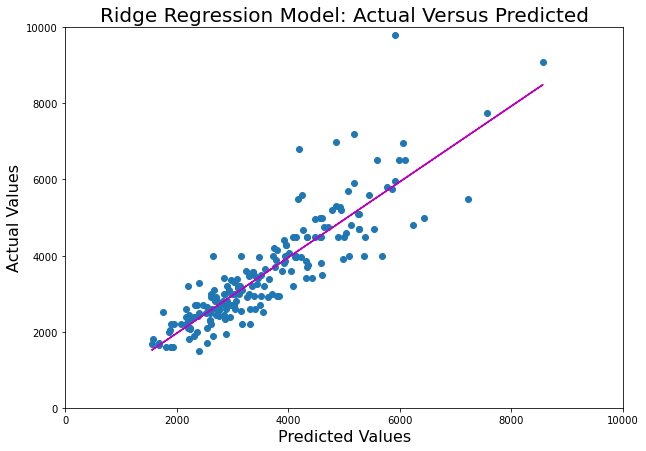

In [24]:
plt.figure(figsize=(10, 7))
plt.scatter(rid_predict, y_test) 

z = np.polyfit(rid_predict, y_test, 1)
p = np.poly1d(z)
plb.plot(rid_predict, p(rid_predict), 'm-')

plt.xlim(0, 10000)
plt.ylim(0, 10000)

plt.title('Ridge Regression Model: Actual Versus Predicted', fontsize=20)
plt.xlabel('Predicted Values', fontsize=16)
plt.ylabel('Actual Values', fontsize=16);

## Evaluation

In [26]:
sf2 = sf.copy()

rid_alpha = 0.6
las_alpha = 0.1

X, y = sf2.drop('price',axis=1), sf2['price']

random_state_range = list(range(1, 10))

lin_count = 0
ridge_count = 0
lasso_count = 0

for state in random_state_range:
    # Training versus Test Data
    # hold out 20% of the data for testing
    X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=state)

    # Scaling for Ridge & Lasso 
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X.values)
    X_test_scaled = scaler.transform(X_test.values)
    
    print("RANDOM STATE: ", state)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~\n")
    
    # Linear Regression
    lin = LinearRegression()
    lin.fit(X, y)
    print(f'Linear Regression train R^2: {lin.score(X, y):.5f}')
    print(f'Linear Regression val R^2: {lin.score(X_test, y_test):.5f}')
    
    lin_predict = lin.predict(X_test)
    lin_rmse = mean_squared_error(y_test, lin_predict, squared=False)
    print(f'RMSE: {lin_rmse:.5}')
    print("")
    
    # LASSO
    las = Lasso(alpha=rid_alpha)
    las.fit(X_train_scaled, y)
    print("LASSO\n")
    print(f'Ridge Regression train R^2: {las.score(X_train_scaled, y):.5f}')
    print(f'Ridge Regression test R^2: {las.score(X_test_scaled, y_test):.5f}')
    
    las_predict = las.predict(X_test_scaled)
    las_rmse = mean_squared_error(y_test, las_predict, squared=False)
    print(f'RMSE: {las_rmse:.5}')
    print("")
    
    # RIDGE
    rid = Ridge(alpha=rid_alpha)
    rid.fit(X_train_scaled, y)
    print("RIDGE\n")
    print(f'Ridge Regression train R^2: {rid.score(X_train_scaled, y):.5f}')
    print(f'Ridge Regression test R^2: {rid.score(X_test_scaled, y_test):.5f}')
    rid_predict = rid.predict(X_test_scaled)
    rid_rmse = mean_squared_error(y_test, rid_predict, squared=False)
    print(f'RMSE: {rid_rmse:.5}')
    print("~~~~~~~~~~~~~~~~~~~~~~~~~\n")
    
    if lin_rmse < las_rmse and lin_rmse < rid_rmse:
        lin_count += 1
    elif las_rmse < lin_rmse and las_rmse < rid_rmse:
        lasso_count += 1
    else:
        ridge_count += 1
        
print("\nFinal Tally --")     
print("Linear: ", lin_count)
print("Lasso: ", lasso_count)
print("Ridge: ", ridge_count)

RANDOM STATE:  1
~~~~~~~~~~~~~~~~~~~~~~~~~

Linear Regression train R^2: 0.79634
Linear Regression val R^2: 0.81372
RMSE: 570.25

LASSO

Ridge Regression train R^2: 0.79630
Ridge Regression test R^2: 0.81364
RMSE: 570.37

RIDGE

Ridge Regression train R^2: 0.79633
Ridge Regression test R^2: 0.81364
RMSE: 570.37
~~~~~~~~~~~~~~~~~~~~~~~~~

RANDOM STATE:  2
~~~~~~~~~~~~~~~~~~~~~~~~~

Linear Regression train R^2: 0.79233
Linear Regression val R^2: 0.80608
RMSE: 581.9

LASSO

Ridge Regression train R^2: 0.79230
Ridge Regression test R^2: 0.80606
RMSE: 581.93

RIDGE

Ridge Regression train R^2: 0.79233
Ridge Regression test R^2: 0.80605
RMSE: 581.94
~~~~~~~~~~~~~~~~~~~~~~~~~

RANDOM STATE:  3
~~~~~~~~~~~~~~~~~~~~~~~~~

Linear Regression train R^2: 0.80771
Linear Regression val R^2: 0.70404
RMSE: 666.54

LASSO

Ridge Regression train R^2: 0.80767
Ridge Regression test R^2: 0.70424
RMSE: 666.32

RIDGE

Ridge Regression train R^2: 0.80770
Ridge Regression test R^2: 0.70404
RMSE: 666.54
~~~~~~~~